# Project Name - Employee Absenteeism

In [1]:
# IMPORTING ALL THE LIBRARY
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

Using TensorFlow backend.


In [2]:
#Importing the data
os.chdir('D:/Data Science/EDWISOR/2_PORTFOLIO/project 1')
data = pd.read_excel('Absenteeism_at_work_Project.xls', sheet_name= 'Absenteeism_at_work' ,header=0,
                     na_values= ['',' ','NA','na','Na','N/A','N/a','n/a'])
####################################################################################################################
#Defining feature as categorical
Categorical_col = ['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
       'Social smoker']
Non_Categorical_col = [i for i in data.columns if i not in Categorical_col]
for i in data.columns:
    if i in Categorical_col: data[i] = pd.Categorical(data[i])


### 1. Applying ML but removing all the missing value of an data

In [3]:
# Self Defined function
####################################################################################################################
# Return the percentage of missing data in the original dataset
def PerOfMissing(d1,d2):# d1--data by droping the NAN value d2--Original data
    percent_of_missing_data = round( 100 - ((len(d1)/len(d2))*100), 2)
    percent_of_missing_data = str(percent_of_missing_data) + '% of data has Missing value'
    return percent_of_missing_data
####################################################################################################################
# Return MAE, MRSE, R², Adjusted R²
def reg_acc(y_true, y_pre):
    from math import sqrt
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    print ("MSE of data: ", mean_squared_error(y_true,y_pre))
    print ("***RMSE of data: ", sqrt(mean_squared_error(y_true,y_pre)),'***')
    print ('Other Parameters:')
    print ("R² : ", r2_score(y_true,y_pre))
    print ('MAE:',mean_absolute_error(y_true,y_pre))

In [4]:
# droping all the NAN value from the data and saving the data in data_without_NAN
data_without_NAN = data.dropna()
print (PerOfMissing(data_without_NAN,data))

13.65% of data has Missing value


#### Model Applied by removing the missing value and preprocessing  the data

In [5]:
data_without_NAN = data_without_NAN.drop(['Height','Weight'],axis=1)
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']

for i in scaling_col:
    data_without_NAN[i]=(data_without_NAN[i]-min(data_without_NAN[i]))/(max(data_without_NAN[i])-min(data_without_NAN[i]))
    #print(i,': Scaling Done')



# Checking the outcome without preprocessing of the data set
#imputing the training and testing data with test_split
from sklearn.model_selection import train_test_split
X = data_without_NAN.drop(['Absenteeism time in hours'], axis=1)
Y = data_without_NAN['Absenteeism time in hours']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

print('#####____MODEL_CHECK____#########')
## KNN model
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=7).fit(x_train,y_train)
y_KNN_predict = KNN_model.predict(x_test)
#accuracy_KNN =  KNN_model.score(y_KNN_predict,y_test)
##print ("accuracy", accuracy_KNN*100)
print('KNN model')
reg_acc(y_KNN_predict,y_test)
print('###########')
print('###########')
# Decision Tree
from sklearn import tree
dec_model   = tree.DecisionTreeRegressor().fit(x_train,y_train)
y_dec_model = dec_model.predict(x_test)
#accuracy_c50 =  c50_model.score(x_test,y_test)
print('Decision Tree')
reg_acc(y_dec_model,y_test)
print('###########')
print('###########')
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=20).fit(x_train,y_train)
y_rf_predict = RF_model.predict(x_test)
print('Random Forest')
reg_acc(y_rf_predict,y_test)
print('###########')
print('###########')

#Linear Reg
from sklearn.linear_model import LinearRegression
lReg = LinearRegression().fit(x_train,y_train)
l_predict = lReg.predict(x_test)
reg_acc(l_predict,y_test)
print('Linear Regression')
print('Intercept :',lReg.intercept_)
print('Coefficient')
for i,coef in zip(data_without_NAN.columns,lReg.coef_):
    print (i,"-->",coef)



#Naye Base
#from sklearn.naive_bayes import GaussianNB
#NB_model = GaussianNB().fit(x_train, y_train)
#y_nb_predict = NB_model.predict(x_test)
#print('Naye Base')
#reg_acc(y_nb_predict,y_test)

#####____MODEL_CHECK____#########
KNN model
MSE of data:  66.68781887755101
***RMSE of data:  8.16626100963905 ***
Other Parameters:
R² :  -0.11571613071126441
MAE: 5.046875
###########
###########
Decision Tree
MSE of data:  736.7879774305555
***RMSE of data:  27.143838664244885 ***
Other Parameters:
R² :  0.04957067331946796
MAE: 10.108072916666668
###########
###########
Random Forest
MSE of data:  149.56804135742186
***RMSE of data:  12.229801362140837 ***
Other Parameters:
R² :  0.028691006943876052
MAE: 6.293561197916667
###########
###########
MSE of data:  43.5766653210526
***RMSE of data:  6.601262403590135 ***
Other Parameters:
R² :  -0.2416276176800649
MAE: 5.016390603178143
Linear Regression
Intercept : 23.39943367103103
Coefficient
ID --> -0.17634088405346032
Reason for absence --> -0.5507704011683515
Month of absence --> 0.06829573735259103
Day of the week --> -0.7244787660593269
Seasons --> -0.1945388458495434
Transportation expense --> 1.6727617638601746
Distance from R

## Pre-Processing the data

### 1. Applying missing value analysis

#### Checking which missing value analysis is good for the data

In [6]:
#Creating list of columns name on basis of NAN value
col_with_nan, col_without_nan = [],[]
for i in data.columns:
    if data[i].isnull().sum() > 0:
        col_with_nan.append(i)
    else :col_without_nan.append(i)

#Creating the table which columns has how much missing value
missing_val = pd.DataFrame(data.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns={'index': 'Variables', 0: 'Missing_Val'})
missing_val['Missing_per'] = round((missing_val['Missing_Val']/len(data))*100,2)
missing_val = missing_val.sort_values('Missing_per', ascending= False).reset_index(drop = True)
missing_val

,Variables,Missing_Val,Missing_per
0,Body mass index,31,4.19
1,Absenteeism time in hours,22,2.97
2,Height,14,1.89
3,Work load Average/day,10,1.35
4,Education,10,1.35
5,Transportation expense,7,0.95
6,Son,6,0.81
7,Disciplinary failure,6,0.81
8,Hit target,6,0.81
9,Social smoker,4,0.54


In [7]:
#random Number
index_NO_nan = data.dropna().index
random_index = []
for i in range(len(col_with_nan)):
    random_index.append(random.choice(index_NO_nan))
####################################################################################################################

#replacing data with nan
dum = data.copy()
for i in range(len(col_with_nan)):
    dum[col_with_nan[i]].loc[random_index[i]] = np.nan
####################################################################################################################

#created table
actV,meanV,medianV = [],[],[]
for i in range(len(col_with_nan)):
    actV.append(data[col_with_nan[i]].loc[random_index[i]])
        
for i in range(len(col_with_nan)):
    if col_with_nan[i] in Categorical_col:
        meanV.append(np.nan)#Categorical data has no mean(Error occur )
        medianV.append(np.nan)#Categorical data has no median
    else:
        meanV.append(data[col_with_nan[i]].mean())
        medianV.append(data[col_with_nan[i]].mean())

frame ={'Actual Value': actV,'Mean': meanV, 'Median': medianV}
data_frame = pd.DataFrame(data = frame, index = col_with_nan, dtype =int)

C:\Users\HP-Omen\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
###########################"KNN with 3"###########################
data_KNN = KNN(k=3).complete(dum)
data_KNN = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))
    
data_frame['KNN_3'] = knn_array
print('##########################DONE##########################')
###########################"KNN with 5"###########################
data_KNN5 = KNN(k=5).complete(dum)
data_KNN5 = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN5[col_with_nan[i]].loc[random_index[i]]))
    
data_frame['KNN_5'] = knn_array
print('##########################DONE##########################')
###########################"KNN with 7"###########################
data_KNN7 = KNN(k=7).complete(dum)
data_KNN7 = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN7[col_with_nan[i]].loc[random_index[i]]))
    
data_frame['KNN_7'] = knn_array
print('##########################DONE##########################')


Imputing row 1/740 with 0 missing, elapsed time: 0.231
Imputing row 101/740 with 1 missing, elapsed time: 0.234
Imputing row 201/740 with 0 missing, elapsed time: 0.238
Imputing row 301/740 with 0 missing, elapsed time: 0.239
Imputing row 401/740 with 0 missing, elapsed time: 0.241
Imputing row 501/740 with 0 missing, elapsed time: 0.243
Imputing row 601/740 with 0 missing, elapsed time: 0.245
Imputing row 701/740 with 0 missing, elapsed time: 0.245
##########################DONE##########################
Imputing row 1/740 with 0 missing, elapsed time: 0.260
Imputing row 101/740 with 1 missing, elapsed time: 0.264
Imputing row 201/740 with 0 missing, elapsed time: 0.267
Imputing row 301/740 with 0 missing, elapsed time: 0.269
Imputing row 401/740 with 0 missing, elapsed time: 0.271
Imputing row 501/740 with 0 missing, elapsed time: 0.272
Imputing row 601/740 with 0 missing, elapsed time: 0.274
Imputing row 701/740 with 0 missing, elapsed time: 0.274
##########################DONE#####

In [9]:
print("SAMPLE TESTED ARRAY IS", random_index)
data_frame

SAMPLE TESTED ARRAY IS [469, 203, 365, 649, 126, 649, 163, 409, 256, 428, 245, 583, 126, 713, 337, 182, 507, 537]


,Actual Value,Mean,Median,KNN_3,KNN_5,KNN_7
Reason for absence,23,NaN,NaN,26,26,26
Month of absence,4,NaN,NaN,4,4,4
Transportation expense,235,221.035,221.035,270,270,270
Distance from Residence to Work,51,29.6676,29.6676,51,51,51
Service time,10,12.5658,12.5658,10,10,10
Age,38,36.4491,36.4491,38,38,38
Work load Average/day,343253,271189,271189,261338,261338,261338
Hit target,98,94.5872,94.5872,93,93,93
Disciplinary failure,0,NaN,NaN,0,0,0
Education,3,NaN,NaN,2,2,2


#### KNN turn's out to produce good output relevent to the other missing value analysis

In [10]:
# Applying the KNN imputation over the data (k = 3)
process_data = KNN(k=3).complete(data)
process_data = pd.DataFrame(data = process_data, columns=data.columns)
##########################################################################################
# So, now on we will proccess further in KNN_pre_data
##########################################################################################
# converting all the non categorical value in integer

for i in process_data.columns:
    process_data[i]= process_data[i].astype('int')

for i in Categorical_col:
    process_data[i] = pd.Categorical(process_data[i])

Imputing row 1/740 with 0 missing, elapsed time: 0.235
Imputing row 101/740 with 1 missing, elapsed time: 0.241
Imputing row 201/740 with 0 missing, elapsed time: 0.245
Imputing row 301/740 with 0 missing, elapsed time: 0.247
Imputing row 401/740 with 0 missing, elapsed time: 0.249
Imputing row 501/740 with 0 missing, elapsed time: 0.250
Imputing row 601/740 with 0 missing, elapsed time: 0.252
Imputing row 701/740 with 0 missing, elapsed time: 0.253


### 3. Feature Selection

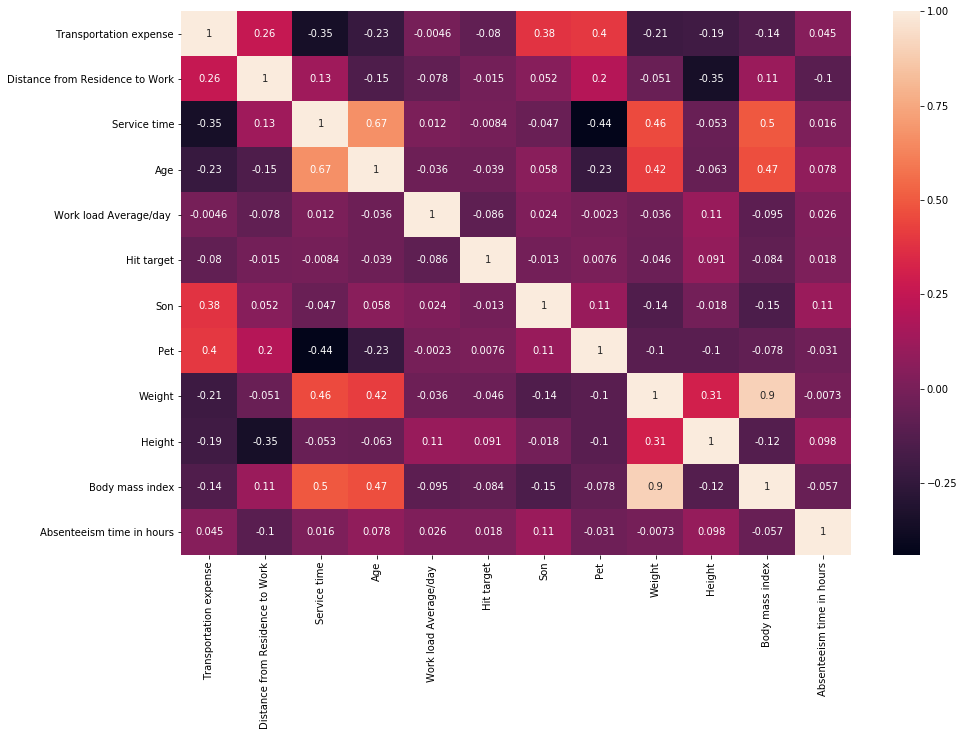

In [11]:
#Generating the correlation heatmap
plt.figure(figsize = (15, 10))
heat = sns.heatmap(process_data.drop(['ID'],axis=1).corr(), annot = True)
heat.figure.savefig('Heatmap.png')

In [12]:
# As per the heat map Weight is highly correlated with Body mass index. Moreover, weight divides with square of an height
#  is equal body mass index so weight and height column will be drop from the data set
process_data = process_data.drop(['Height','Weight'],axis=1)

### 4. Normalisation and Standardization

In [13]:
# All the numerical data will be scaled
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']

In [14]:
for i in scaling_col:
    process_data[i]=(process_data[i]-min(process_data[i]))/(max(process_data[i])-min(process_data[i]))
    print(i,': Scaling Done')

Transportation expense : Scaling Done
Distance from Residence to Work : Scaling Done
Service time : Scaling Done
Work load Average/day  : Scaling Done
Hit target : Scaling Done
Body mass index : Scaling Done


In [15]:
# Saving of the processed data set
process_data.to_excel('Process data_new.xls', index = None)

In [16]:
# Spliting the data set in train-test
from sklearn.model_selection import train_test_split
Pro_X = process_data.drop(['Absenteeism time in hours'], axis=1)
Pro_Y = process_data['Absenteeism time in hours']
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(Pro_X,Pro_Y, test_size=0.2)

In [17]:
# Applying KNN Machine learnig algorithm
from sklearn.neighbors import KNeighborsRegressor
Pro_KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_TRAIN,Y_TRAIN)
Final_KNN_predict = Pro_KNN_model.predict(X_TEST)
reg_acc(Y_TEST,Final_KNN_predict)

MSE of data:  292.2972972972973
***RMSE of data:  17.09670428174089 ***
Other Parameters:
R² :  -0.15988070175311475
MAE: 7.360360360360361


In [18]:
#Saving the train-test data into excel sheet
#write = pd.ExcelWriter('Train_Test_data.xlsx', engine='xlsxwriter')
#X_TRAIN.to_excel(write,sheet_name='TrainX',index=False)
#Y_TRAIN.to_excel(write,sheet_name='TrainY',index=False)
#X_TEST.to_excel(write,sheet_name='TestX',index=False)
#Y_TEST.to_excel(write,sheet_name='TestY',index=False)
#write.save()

## Other algorithm

In [19]:
#Applying linear regression machine learning algorithm
from sklearn.linear_model import LinearRegression
linReg = LinearRegression().fit(X_TRAIN,Y_TRAIN)
linear_predict = linReg.predict(X_TEST)
reg_acc(Y_TEST,linear_predict)
print('Intercept :',linReg.intercept_)
print('Coefficient')
for i,coef in zip(process_data.columns,linReg.coef_):
    print (i,"-->",coef)

MSE of data:  234.78154897008716
***RMSE of data:  15.322582973183312 ***
Other Parameters:
R² :  0.06835064745353725
MAE: 6.44050414909134
Intercept : 10.382840681365666
Coefficient
ID --> -0.1785224414710312
Reason for absence --> -0.38356380969241666
Month of absence --> 0.19603574229512963
Day of the week --> -0.4067291076554663
Seasons --> -0.10238094809366391
Transportation expense --> -0.7100339762852044
Distance from Residence to Work --> -5.5165700764792
Service time --> -10.002115352992854
Age --> 0.45206587835384143
Work load Average/day  --> 1.965275701934068
Hit target --> 4.654967983778953
Disciplinary failure --> -10.86668326986222
Education --> -2.0910419563864324
Son --> 0.3700326927068894
Social drinker --> 2.0414851493035338
Social smoker --> 1.1644489819486064
Pet --> -0.493629161147407
Body mass index --> -9.09113596801323


In [20]:
#Applying all the different machine learning algorithm to check which produce the best result
#################################################################
from sklearn import tree
Deci_tree_pre = tree.DecisionTreeRegressor().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Decision Tree ML')
reg_acc(Deci_tree_pre,Y_TEST)
print('######END########')
#################################################################
from sklearn.ensemble import RandomForestRegressor
Ran_for_pre = RandomForestRegressor(n_estimators=50).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Random Forest ML')
reg_acc(Ran_for_pre,Y_TEST)
print('######END########')
#################################################################
from sklearn.naive_bayes import GaussianNB
print('Naive Bayes')
NB_pre = GaussianNB().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
reg_acc(NB_pre,Y_TEST)

Decision Tree ML
MSE of data:  345.61054804804803
***RMSE of data:  18.59060375695335 ***
Other Parameters:
R² :  -1.780393438617672
MAE: 7.15427927927928
######END########
Random Forest ML
MSE of data:  260.25189356272597
***RMSE of data:  16.13232449347353 ***
Other Parameters:
R² :  -4.7621185023122194
MAE: 6.671
######END########
Naive Bayes
MSE of data:  889.8108108108108
***RMSE of data:  29.829696793812886 ***
Other Parameters:
R² :  -0.6783951750053456
MAE: 18.93243243243243


## KNN Map

#### Measuring the number of 'k' suited with this Data set

In [21]:
list_mae,list_mse,list_r2,num=[],[],[],[]
for i in range(50):
    if i%2!=0:
        dummy_KNN = KNeighborsRegressor(n_neighbors=i).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
        num.append(i)
        list_mae.append(mean_absolute_error(dummy_KNN,Y_TEST))
        list_mse.append(mean_squared_error(dummy_KNN,Y_TEST))
        list_r2.append(r2_score(dummy_KNN,Y_TEST))

*********** M A E ***********
Kth Value: 27
Lowest MAE Value: 6.001001001001001


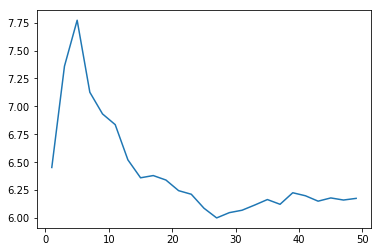

In [22]:
sns.lineplot(x=num,y=list_mae)
print('*********** M A E ***********')
print('Kth Value:',num[list_mae.index(min(list_mae))])
print('Lowest MAE Value:',min(list_mae))

*********** M S E ***********
Kth Value: 37
Lowest MSE Value: 231.97302232839118


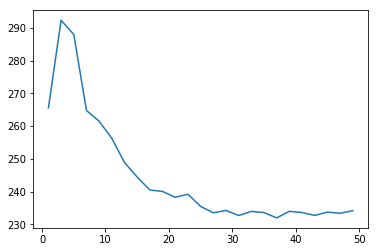

In [23]:
sns.lineplot(x=num,y=list_mse)
print('*********** M S E ***********')
print('Kth Value:',num[list_mse.index(min(list_mse))])
print('Lowest MSE Value:',min(list_mse))

*********** R2 Value ***********
Kth Value 3
Lowest R2 Value: -3.325567767965528


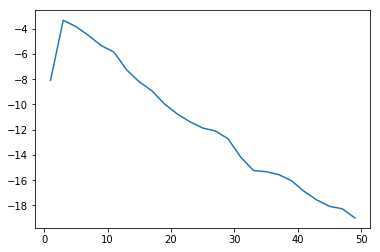

In [24]:
sns.lineplot(x=num,y=list_r2)
print('*********** R2 Value ***********')
print('Kth Value',num[list_r2.index(max(list_r2))])
print('Lowest R2 Value:',max(list_r2))